<a href="https://colab.research.google.com/github/lilyhuong/Car-Insurance-Claim-Prediction/blob/master/Car_claim_prediction_Hajar_CHLOUH_Maha_CHLOUH_Thi_Huong_NGUYEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.combine import SMOTEENN 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [294]:
import random

In [295]:
random.seed(42)

The Dataset contains information on policyholders having the attributes like policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable indicating whether the policyholder files a claim in the next 6 months or not.

In [296]:
link1 = "https://raw.githubusercontent.com/lilyhuong/Car-Insurance-Claim-Prediction/master/test%202.csv"
link2 = "https://raw.githubusercontent.com/lilyhuong/Car-Insurance-Claim-Prediction/master/train%202.csv"
link3 = "https://raw.githubusercontent.com/lilyhuong/Car-Insurance-Claim-Prediction/master/sample_submission.csv"

In [297]:
train = pd.read_csv(link2)
test = pd.read_csv(link1)
submission = pd.read_csv(link3)

In [298]:
test.shape

(39063, 43)

In [299]:
train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [300]:
test

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
39059,ID97652,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
39060,ID97653,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
39061,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


In [301]:
test = pd.merge(test, submission, on = "policy_id")

In [302]:
train.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


First, we will concatenate 2 dataframes into one dataframe to be easier to change the value of split train - test 

In [303]:
df = result = pd.concat([train, test], ignore_index = True )

In [304]:
# from sklearn.utils import shuffle
# df = shuffle(df)

In [305]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97650,ID97651,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
97651,ID97652,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
97652,ID97653,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,1
97653,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1


our final dataframe have 97655 observations and 44 variables 

In next step, we will drop some columns that is not important for our estimation

In [306]:
len(np.unique(df["area_cluster"].values))

22

In [307]:
df.area_cluster.value_counts()

C8     22815
C2     12158
C5     11683
C3     10172
C14     6215
C13     5618
C10     5273
C9      4534
C7      3629
C12     2656
C1      2473
C11     1914
C19     1581
C6      1489
C15     1288
C4      1112
C17      788
C16      676
C21      650
C18      421
C22      316
C20      194
Name: area_cluster, dtype: int64

We have total 22 difference category for this variable, I will drop this column. Variable policy_id do not have any impact on the result of our estimation, therefore I will drop this column too

In [308]:
df = df.drop(["area_cluster", "policy_id"], axis = 1)

In [309]:
df.shape

(97655, 42)

In [310]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000
mean,0.611269,0.069508,0.469287,18822.60809,1.763586,3.138109,1161.655829,3.624423,5.245579,4.853024,3850.017715,1672.050187,1553.214500,1384.966750,1.759664,0.438390
std,0.414494,0.056774,0.122560,17656.79257,1.135832,1.831993,266.560176,0.484274,0.430432,0.228059,311.745860,112.042508,79.385788,212.543007,1.388415,0.496192
min,0.002735,0.000000,0.288462,290.00000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.209729,0.020000,0.375000,6112.00000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000
50%,0.573891,0.060000,0.451923,8794.00000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.039740,0.110000,0.548077,27003.00000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,1.000000
max,1.396641,1.000000,1.000000,73430.00000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


Text(0.5, 1.0, 'Distribution of average age by model')

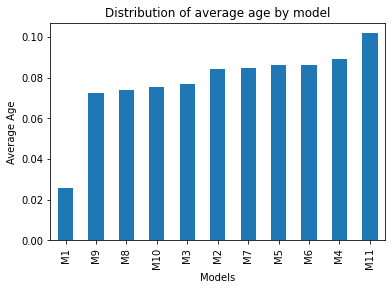

In [311]:
df.groupby("model")["age_of_car"].mean().sort_values().plot(kind="bar")
plt.xlabel("Models")
plt.ylabel("Average Age")
plt.title("Distribution of average age by model")

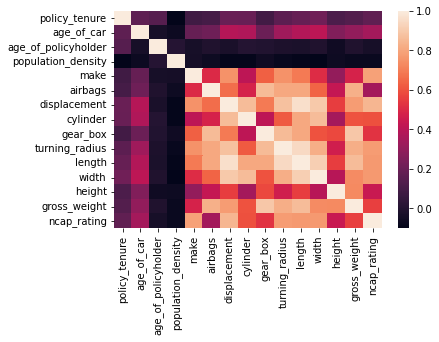

In [312]:
correlation = df.select_dtypes("number").drop("is_claim", axis=1).corr()
sns.heatmap(correlation)

In [313]:
def data_preprocessor(df):
    
    #Clean max_torque and max_power cols
    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    #Drop original cols
#    df.drop(["max_torque","max_power"],axis=1,inplace=True)

data_preprocessor(df)

## EDA
### EDA on numerical variables
#### A summary statistics for the numerical variables

In [314]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
policy_tenure,97655.0,0.611269,0.414494,0.002735,0.209729,0.573891,1.039740,1.396641
age_of_car,97655.0,0.069508,0.056774,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,97655.0,0.469287,0.122560,0.288462,0.375000,0.451923,0.548077,1.000000
population_density,97655.0,18822.608090,17656.792570,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,97655.0,1.763586,1.135832,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,97655.0,3.138109,1.831993,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,97655.0,1161.655829,266.560176,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,97655.0,3.624423,0.484274,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,97655.0,5.245579,0.430432,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,97655.0,4.853024,0.228059,4.500000,4.600000,4.800000,5.000000,5.200000


#### The distribution of numerical variables

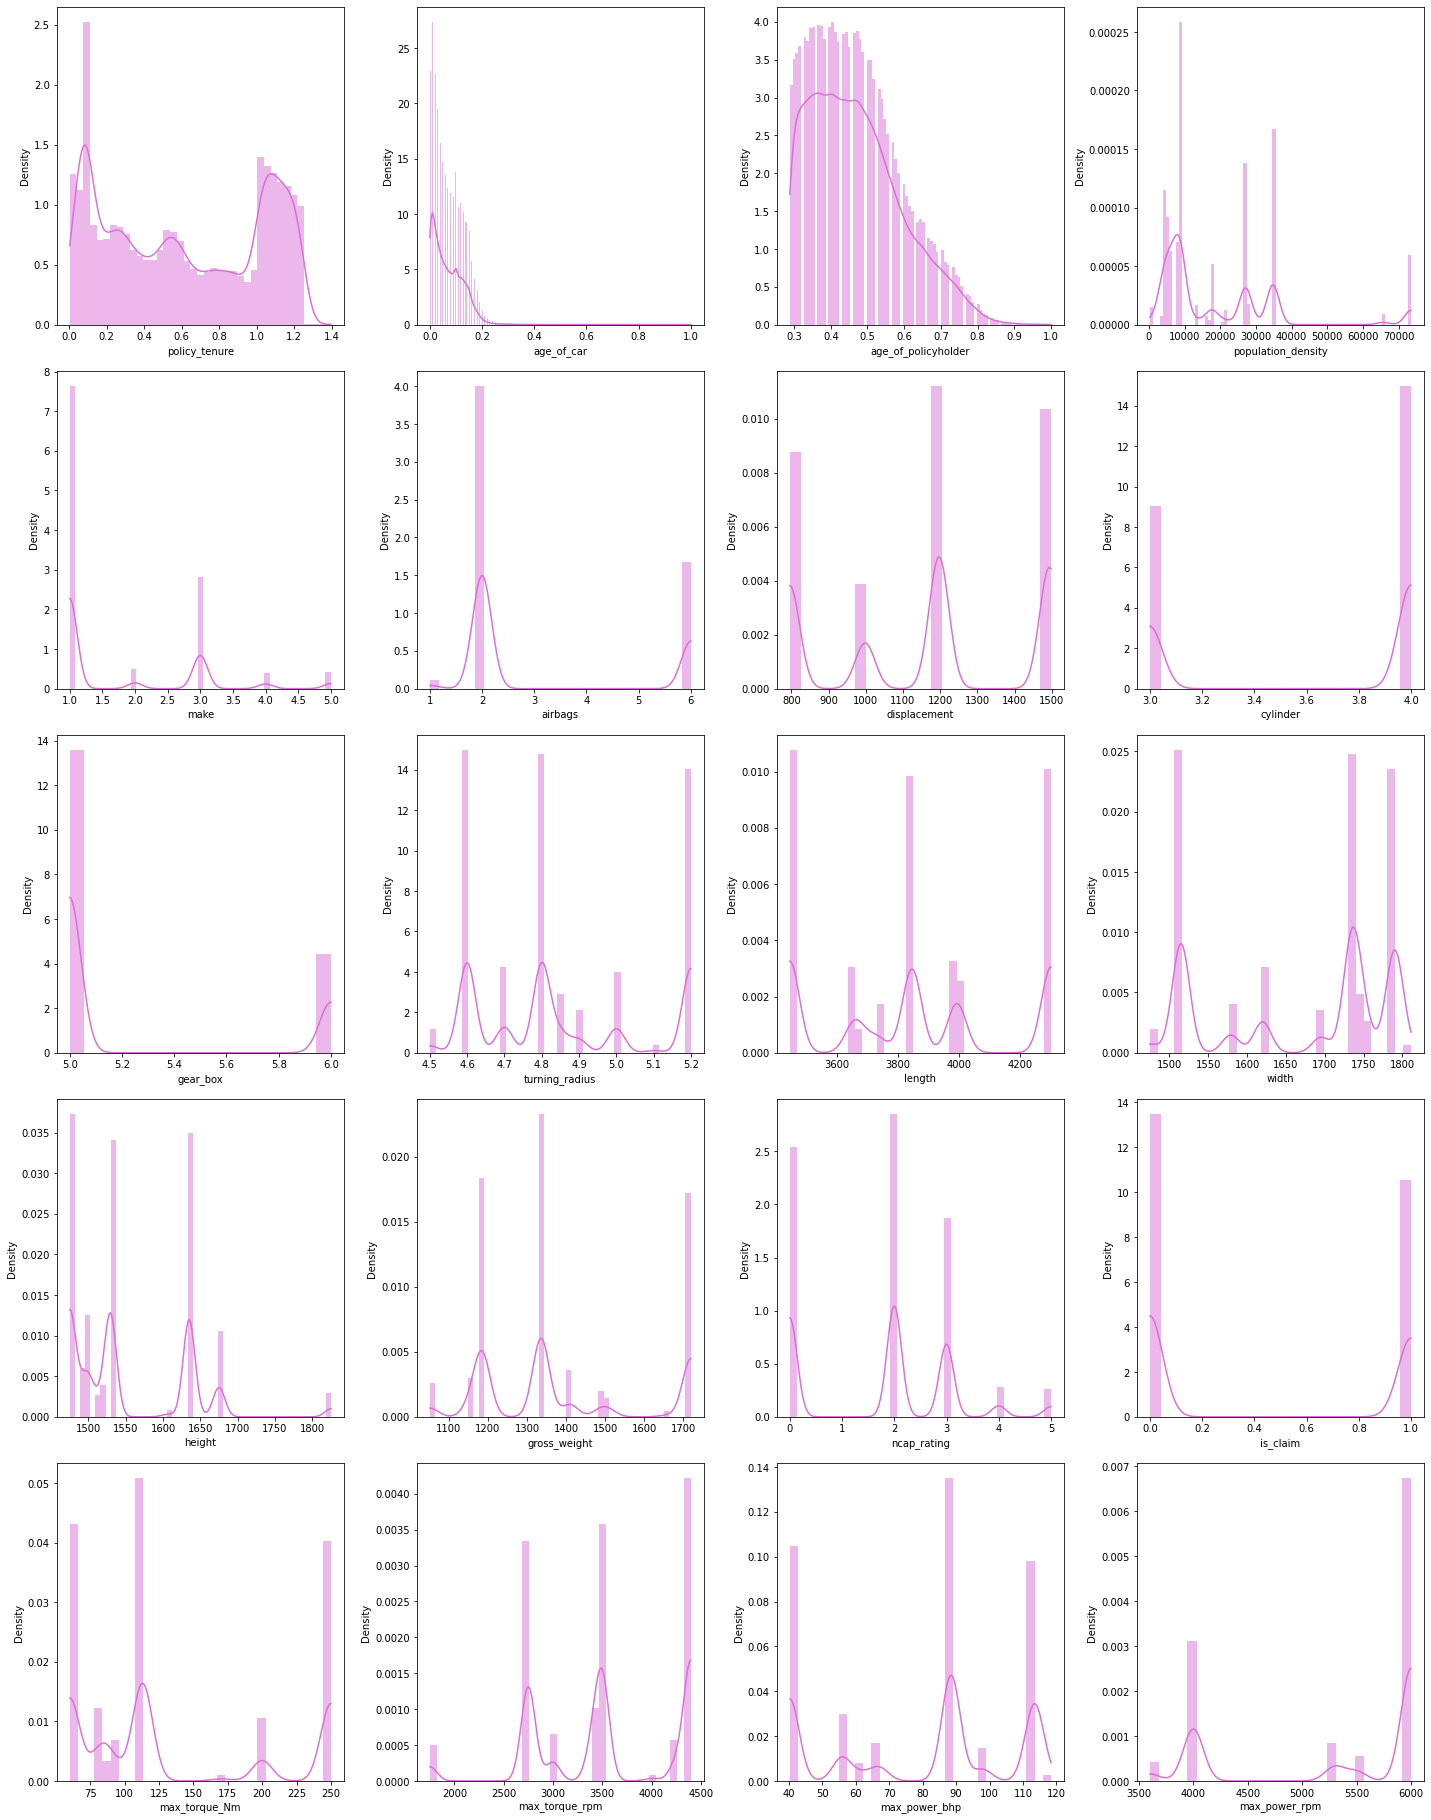

In [315]:
#The Graphs showing the distribution of the numerical data 
cols = 4
rows = 6
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax, color = 'orchid', kde=True, stat="density", linewidth=0)
    plt.ylabel('Density')
fig.tight_layout()  
plt.show()

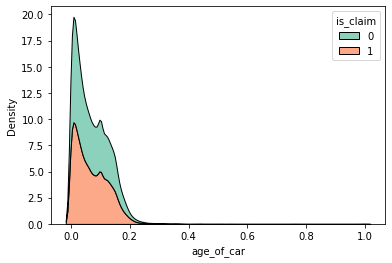

In [316]:
sns.kdeplot(data=df, x="age_of_car", hue="is_claim", multiple="stack", common_norm=False, palette='Set2')

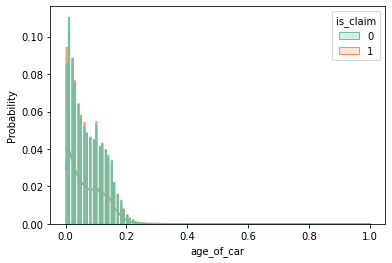

In [317]:
sns.histplot(
    df, x="age_of_car", hue="is_claim", element="step",
    stat="probability", common_norm=False, kde=True, palette='Set2'
)

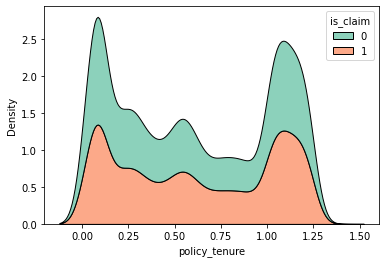

In [318]:
sns.kdeplot(data=df, x="policy_tenure", hue="is_claim", multiple="stack", common_norm=False , palette='Set2')

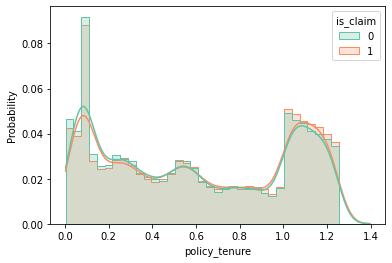

In [319]:
sns.histplot(
    df, x="policy_tenure", hue="is_claim", element="step",
    stat="probability", common_norm=False, kde=True, palette='Set2'
)

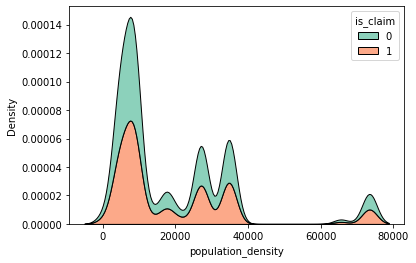

In [320]:
sns.kdeplot(data=df, x="population_density", hue="is_claim", multiple="stack", common_norm=False, palette='Set2')

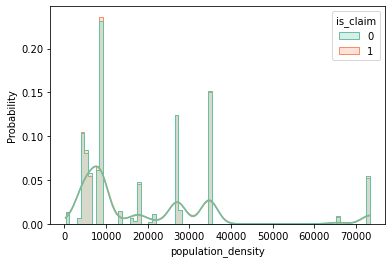

In [321]:
sns.histplot(
    df, x="population_density", hue="is_claim", element="step",
    stat="probability", common_norm=False, kde=True, palette='Set2'
)

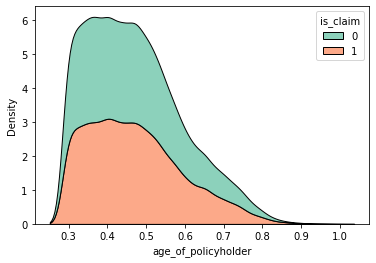

In [322]:
sns.kdeplot(data=df, x="age_of_policyholder", hue="is_claim", multiple="stack", common_norm=False, palette='Set2')

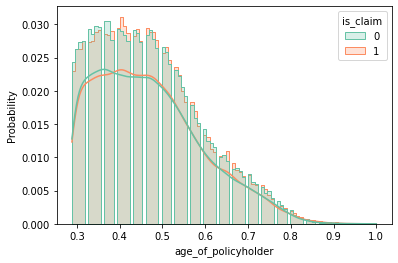

In [323]:
sns.histplot(
    df, x="age_of_policyholder", hue="is_claim", element="step",
    stat="probability", common_norm=False, kde=True, palette='Set2'
)

### EDA on categorical variables

In [324]:
# for categorical variables: nunber of observations, unique, top and frequency
df.describe(include=[object]).transpose()

,count,unique,top,freq
segment,97655,6,B2,30363
model,97655,11,M1,24988
fuel_type,97655,3,Petrol,34125
max_torque,97655,9,113Nm@4400rpm,29503
max_power,97655,9,88.50bhp@6000rpm,29503
engine_type,97655,11,F8D Petrol Engine,24988
is_esc,97655,2,No,66997
is_adjustable_steering,97655,2,Yes,59044
is_tpms,97655,2,No,74272
is_parking_sensors,97655,2,Yes,93632


#### Frequency distribution of categorical variables

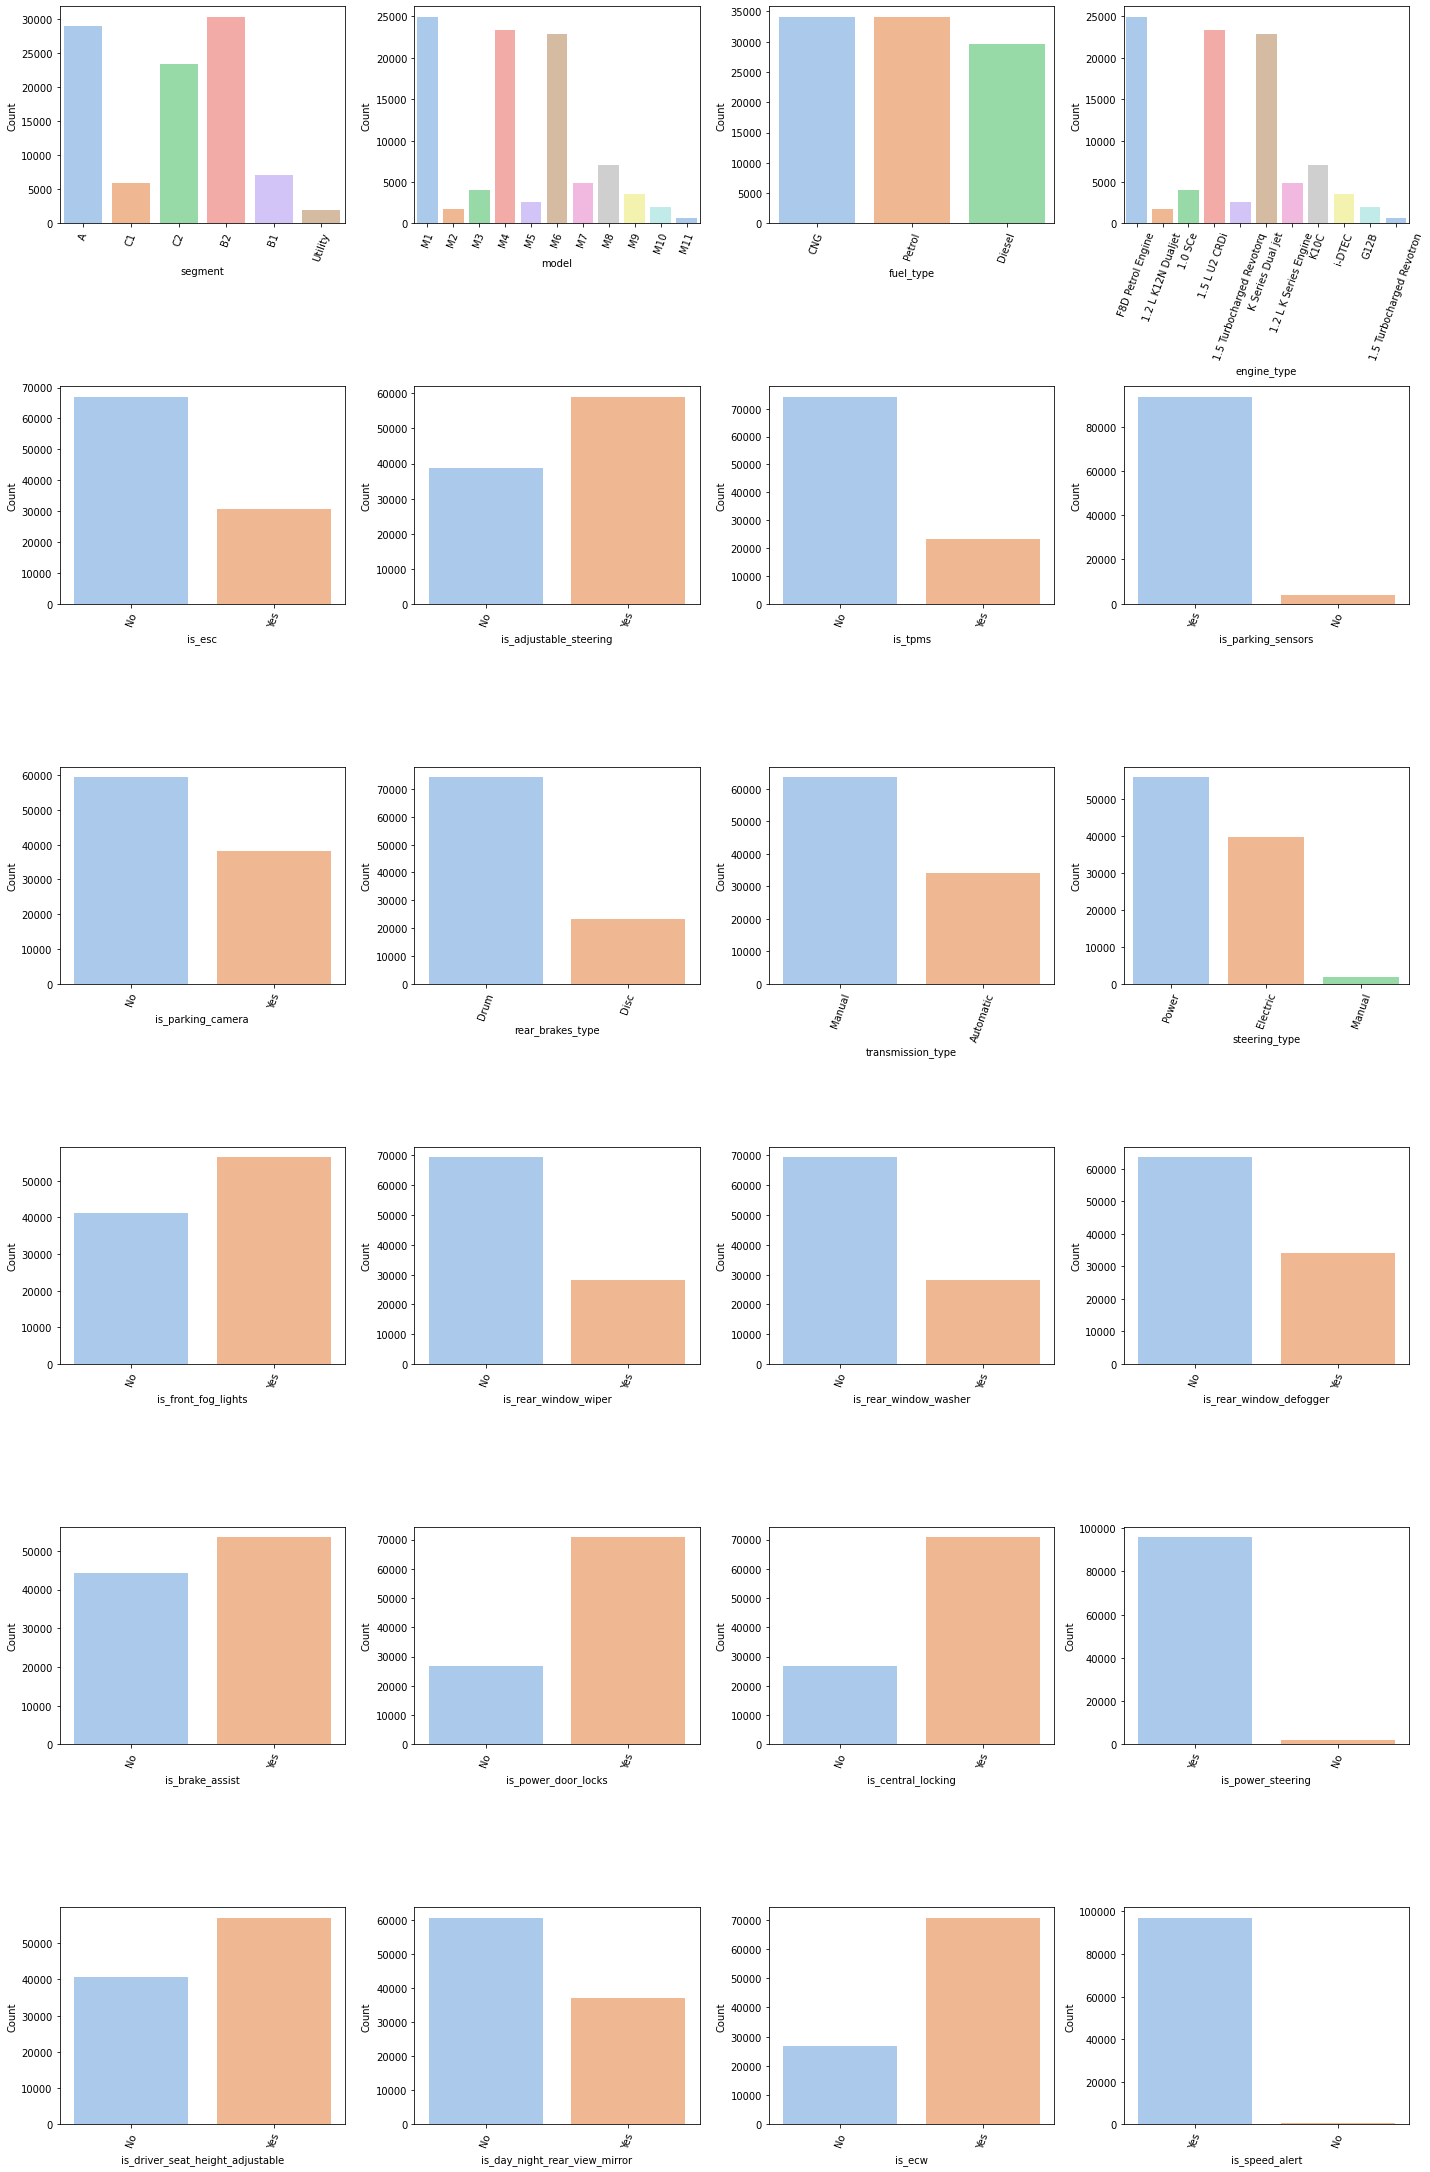

In [325]:

cols = 4
rows = 7
num_cols = df.select_dtypes('object').drop(["max_power","max_torque"], axis=1).columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.countplot(x = df[col], ax = ax, palette='pastel')
    plt.xticks(rotation=70)
    plt.ylabel('Count')
fig.tight_layout()  
plt.show()

#### The proportion of multi-categorical variables based on the target value


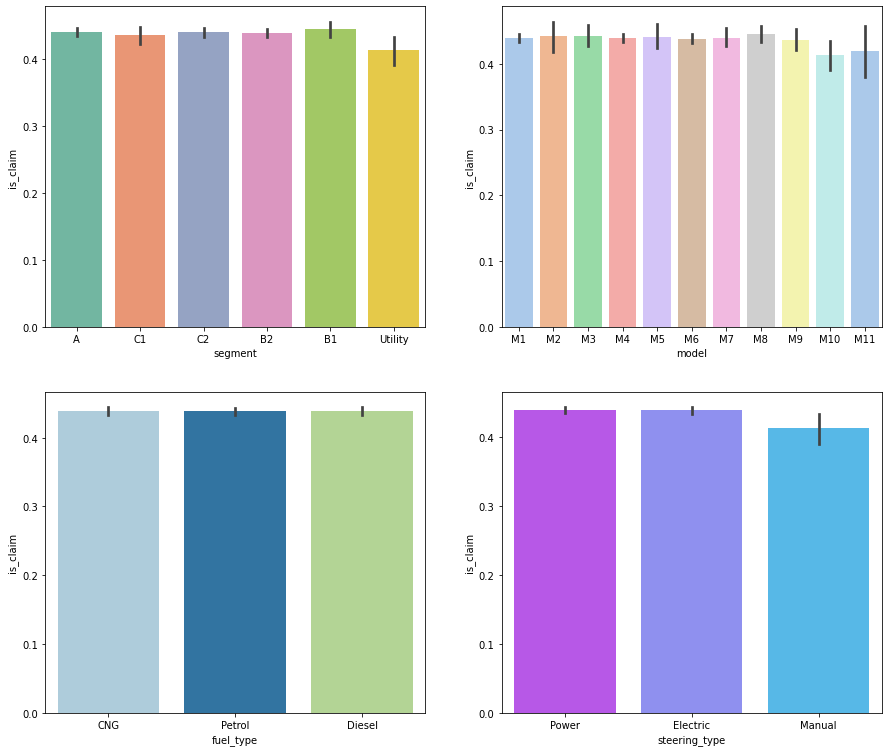

In [326]:
#bar plot comparing the claim declaration for the different categorial variables
fig, axes = plt.subplots(2, 2, figsize=(15, 13))
axes = axes.flatten()

sns.barplot(ax = axes[0],y='is_claim', x='segment', data = df, palette='Set2');
sns.barplot(ax = axes[1],y='is_claim', x='model', data = df, palette='pastel');
sns.barplot(ax = axes[2],y='is_claim', x='fuel_type', data = df, palette='Paired');
sns.barplot(ax = axes[3],y='is_claim', x='steering_type', data = df, palette='cool_r');

#plt.xticks(rotation=70)
plt.show()

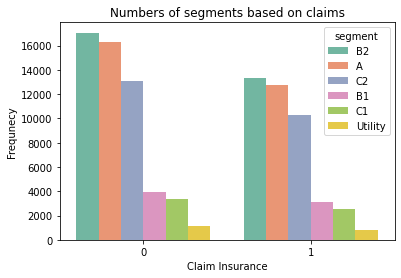

In [327]:
# Numbers of segments based on claims

ffg = df.groupby("is_claim")["segment"].value_counts().rename("Frequency").to_frame().reset_index()
sns.barplot(x="is_claim",
           y="Frequency",
           hue="segment",
           palette='Set2',
           data=ffg)
plt.xlabel("Claim Insurance")
plt.ylabel("Frequnecy")
plt.title("Numbers of segments based on claims");

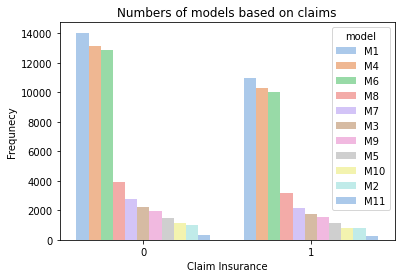

In [328]:
# Numbers of models based on cliams

ffg = df.groupby("is_claim")["model"].value_counts().rename("Frequency").to_frame().reset_index()
sns.barplot(x="is_claim",
           y="Frequency",
           hue="model",
           palette='pastel',
           data=ffg)
plt.xlabel("Claim Insurance")
plt.ylabel("Frequnecy")
plt.title("Numbers of models based on claims");

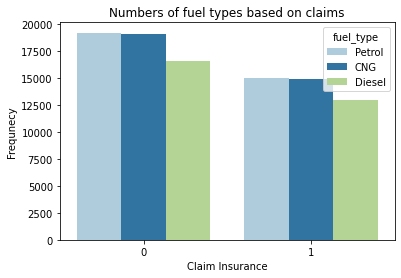

In [329]:

ffg = df.groupby("is_claim")["fuel_type"].value_counts().rename("Frequency").to_frame().reset_index()
sns.barplot(x="is_claim",
           y="Frequency",
           hue="fuel_type",
           palette='Paired',
           data=ffg)
plt.xlabel("Claim Insurance")
plt.ylabel("Frequnecy")
plt.title("Numbers of fuel types based on claims");

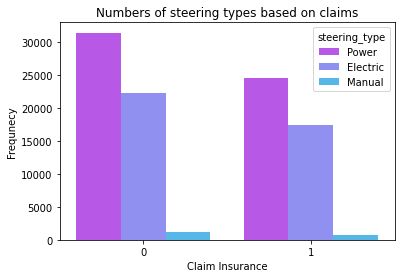

In [330]:
ffg = df.groupby("is_claim")["steering_type"].value_counts().rename("Frequency").to_frame().reset_index()
sns.barplot(x="is_claim",
           y="Frequency",
           hue="steering_type",
           palette='cool_r',
           data=ffg)
plt.xlabel("Claim Insurance")
plt.ylabel("Frequnecy")
plt.title("Numbers of steering types based on claims");

In [331]:
grouped_name = df.groupby(['segment']).is_claim.describe()
grouped_name.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
B2,30363.0,0.438198,0.496174,0.0,0.0,0.0,1.0,1.0
A,29011.0,0.439006,0.496274,0.0,0.0,0.0,1.0,1.0
C2,23383.0,0.439037,0.496280,0.0,0.0,0.0,1.0,1.0
B1,7067.0,0.444036,0.496893,0.0,0.0,0.0,1.0,1.0
C1,5897.0,0.435476,0.495861,0.0,0.0,0.0,1.0,1.0
Utility,1934.0,0.412616,0.492432,0.0,0.0,0.0,1.0,1.0


In [332]:
grouped_name = df.groupby(['model']).is_claim.describe()
grouped_name.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
M1,24988.0,0.438530,0.496217,0.0,0.0,0.0,1.0,1.0
M4,23383.0,0.439037,0.496280,0.0,0.0,0.0,1.0,1.0
M6,22827.0,0.437640,0.496107,0.0,0.0,0.0,1.0,1.0
M8,7067.0,0.444036,0.496893,0.0,0.0,0.0,1.0,1.0
M7,4886.0,0.439419,0.496367,0.0,0.0,0.0,1.0,1.0
M3,4023.0,0.441959,0.496682,0.0,0.0,0.0,1.0,1.0
M9,3508.0,0.435291,0.495866,0.0,0.0,0.0,1.0,1.0
M5,2650.0,0.440755,0.496571,0.0,0.0,0.0,1.0,1.0
M10,1934.0,0.412616,0.492432,0.0,0.0,0.0,1.0,1.0


In [333]:
grouped_name = df.groupby(['fuel_type']).is_claim.describe()
grouped_name.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
fuel_type,,,,,,,,
Petrol,34125.0,0.438271,0.496182,0.0,0.0,0.0,1.0,1.0
CNG,33989.0,0.438201,0.496173,0.0,0.0,0.0,1.0,1.0
Diesel,29541.0,0.438746,0.496242,0.0,0.0,0.0,1.0,1.0


In [334]:
grouped_name = df.groupby(['steering_type']).is_claim.describe()
grouped_name.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
steering_type,,,,,,,,
Power,56037.0,0.439228,0.496297,0.0,0.0,0.0,1.0,1.0
Electric,39684.0,0.438464,0.496205,0.0,0.0,0.0,1.0,1.0
Manual,1934.0,0.412616,0.492432,0.0,0.0,0.0,1.0,1.0


### Other analysis

Text(0.5, 1.0, 'Correlation between the duration of the contract and the age of the policyholder ')

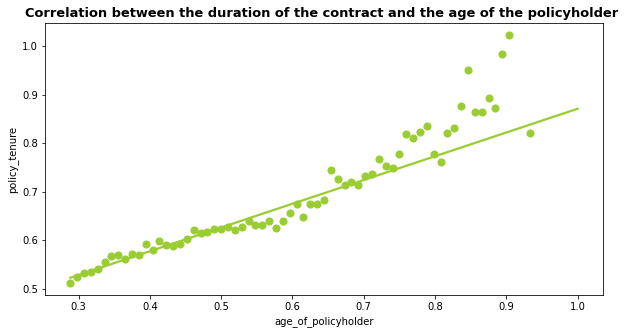

In [335]:
plt.figure(figsize=[10,5])

ax = sns.regplot(x=df["age_of_policyholder"], y=df["policy_tenure"], x_bins=5000, ci=None, color="yellowgreen")
def setBold(txt): return r"$\bf{" + str(txt) + "}$"

plt.title("Correlation between the duration of the contract and the age of the policyholder ",fontweight='bold', size=13)

Text(0.5, 1.0, 'Distribution of average age by segment')

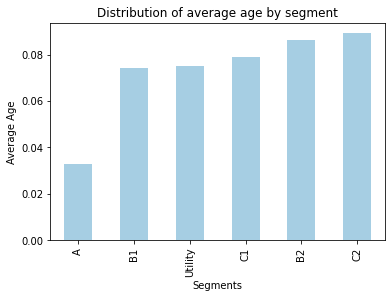

In [336]:
df.groupby("segment")["age_of_car"].mean().sort_values().plot(kind="bar", colormap='Paired')
plt.xlabel("Segments")
plt.ylabel("Average Age")
plt.title("Distribution of average age by segment")

Text(0.5, 1.0, 'Distribution of average age by fuel type')

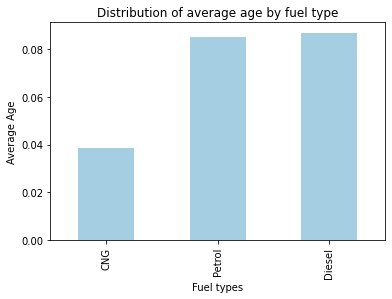

In [337]:
df.groupby("fuel_type")["age_of_car"].mean().sort_values().plot(kind="bar", colormap='Paired')
plt.xlabel("Fuel types")
plt.ylabel("Average Age")
plt.title("Distribution of average age by fuel type")

Text(0.5, 1.0, 'Distribution of average age by steering type')

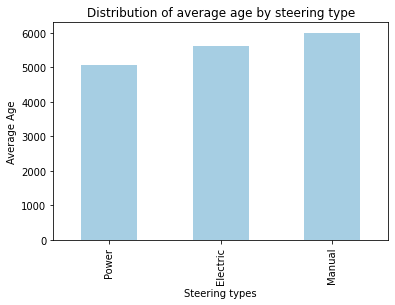

In [338]:
df.groupby("steering_type")["max_power_rpm"].mean().sort_values().plot(kind="bar", colormap='Paired')
plt.xlabel("Steering types")
plt.ylabel("Average Age")
plt.title("Distribution of average age by steering type")

Text(0.5, 1.0, 'Distribution of average age by model')

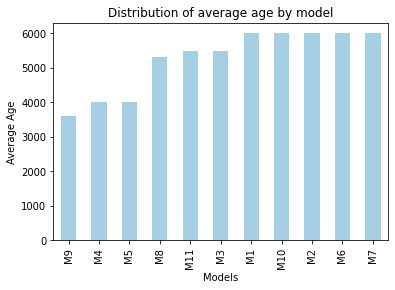

In [339]:
df.groupby("model")["max_power_rpm"].mean().sort_values().plot(kind="bar", colormap='Paired')
plt.xlabel("Models")
plt.ylabel("Average Age")
plt.title("Distribution of average age by model")

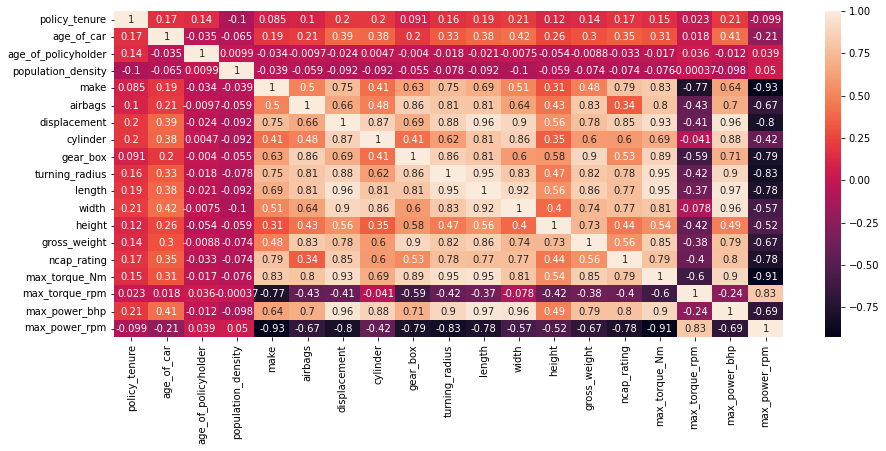

In [340]:
correlation = df.select_dtypes("number").drop("is_claim", axis=1).corr()
plt.figure(figsize=(15,6))
sns.heatmap(correlation,annot=True)

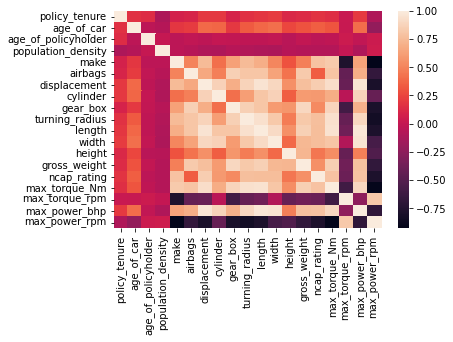

In [341]:
correlation = df.select_dtypes("number").drop("is_claim", axis=1).corr()
sns.heatmap(correlation)

In [342]:
corr = df.select_dtypes("number").drop("is_claim", axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-342-060b0340065b>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
policy_tenure,1.00,0.17,0.14,-0.10,0.08,0.10,0.20,0.20,0.09,0.16,0.19,0.21,0.12,0.14,0.17,0.15,0.02,0.21,-0.10
age_of_car,0.17,1.00,-0.03,-0.06,0.19,0.21,0.39,0.38,0.20,0.33,0.38,0.42,0.26,0.30,0.35,0.31,0.02,0.41,-0.21
age_of_policyholder,0.14,-0.03,1.00,0.01,-0.03,-0.01,-0.02,0.00,-0.00,-0.02,-0.02,-0.01,-0.05,-0.01,-0.03,-0.02,0.04,-0.01,0.04
population_density,-0.10,-0.06,0.01,1.00,-0.04,-0.06,-0.09,-0.09,-0.06,-0.08,-0.09,-0.10,-0.06,-0.07,-0.07,-0.08,-0.00,-0.10,0.05
make,0.08,0.19,-0.03,-0.04,1.00,0.50,0.75,0.41,0.63,0.75,0.69,0.51,0.31,0.48,0.79,0.83,-0.77,0.64,-0.93
airbags,0.10,0.21,-0.01,-0.06,0.50,1.00,0.66,0.48,0.86,0.81,0.81,0.64,0.43,0.83,0.34,0.80,-0.43,0.70,-0.67
displacement,0.20,0.39,-0.02,-0.09,0.75,0.66,1.00,0.87,0.69,0.88,0.96,0.90,0.56,0.78,0.85,0.93,-0.41,0.96,-0.80
cylinder,0.20,0.38,0.00,-0.09,0.41,0.48,0.87,1.00,0.41,0.62,0.81,0.86,0.35,0.60,0.60,0.69,-0.04,0.88,-0.42
gear_box,0.09,0.20,-0.00,-0.06,0.63,0.86,0.69,0.41,1.00,0.86,0.81,0.60,0.58,0.90,0.53,0.89,-0.59,0.71,-0.79
turning_radius,0.16,0.33,-0.02,-0.08,0.75,0.81,0.88,0.62,0.86,1.00,0.95,0.83,0.47,0.82,0.78,0.95,-0.42,0.90,-0.83


In [343]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

<ipython-input-343-ab81fba373dd>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
policy_tenure,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age_of_car,0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age_of_policyholder,0.14,-0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
population_density,-0.10,-0.06,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
make,0.08,0.19,-0.03,-0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
airbags,0.10,0.21,-0.01,-0.06,0.50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
displacement,0.20,0.39,-0.02,-0.09,0.75,0.66,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
cylinder,0.20,0.38,0.00,-0.09,0.41,0.48,0.87,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gear_box,0.09,0.20,-0.00,-0.06,0.63,0.86,0.69,0.41,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
turning_radius,0.16,0.33,-0.02,-0.08,0.75,0.81,0.88,0.62,0.86,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [344]:
corr = df.select_dtypes("number").drop("is_claim", axis=1).corr()
df_styled = corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-344-5a75b9c29c06>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_styled = corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [345]:
!pip3 install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [346]:
import xlrd
writer = pd.ExcelWriter('df.xlsx', engine='xlsxwriter', options={'strings_to_urls': False})
df.to_excel(writer, index = False)
writer.save()
writer.close()

<ipython-input-346-58af8e5e1665>:2: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  writer = pd.ExcelWriter('df.xlsx', engine='xlsxwriter', options={'strings_to_urls': False})
/usr/local/lib/python3.8/dist-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


<Figure size 1440x1080 with 0 Axes>

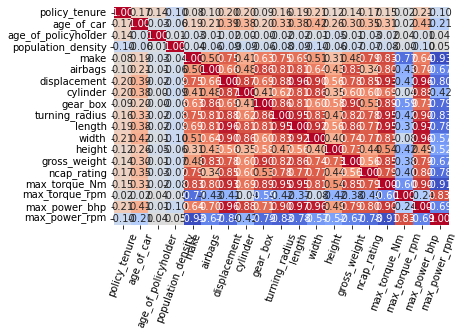

In [347]:
plt.figure(figsize=(20,15))
fig, ax = plt.subplots()

sns.heatmap(df.select_dtypes("number").drop("is_claim", axis=1).corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False,  ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.xticks(rotation=70)

#plt.savefig('result1.png', bbox_inches='tight', pad_inches=0.0)

plt.show()

## Checking Outliers 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


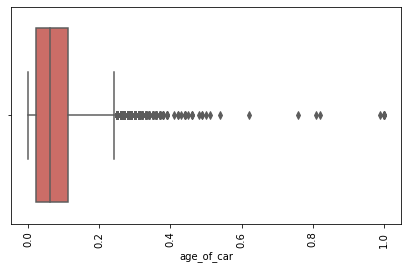

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


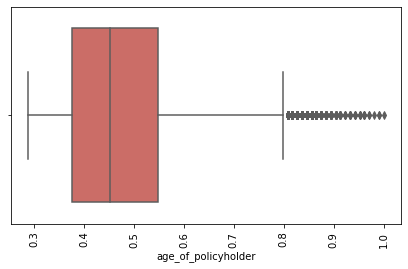

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


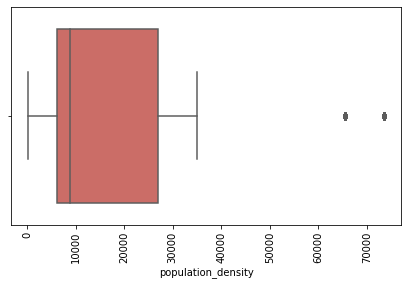

In [348]:
list_boxlot = ['age_of_car','age_of_policyholder','population_density' ]
for i in list_boxlot:
    plt.figure(figsize= (7,4))
    sns.boxplot(df[i], data = df, palette = "hls")
    plt.xticks (rotation = 90)
    plt.yticks (rotation = 90)
    plt.show()

In [349]:
Q1 = df[['age_of_car','age_of_policyholder','population_density']].quantile(0.25)
Q3 = df[['age_of_car','age_of_policyholder','population_density']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age_of_car                 0.090000
age_of_policyholder        0.173077
population_density     20891.000000
dtype: float64


In [350]:
df = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis = 1 )]

<ipython-input-350-e19848e25bef>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis = 1 )]


In [351]:
df.shape

(90571, 46)

After moving outlier, we have only 90571 observations

In [352]:
#for i in ['fuel_type', 'rear_brakes_type', 'transmission_type', "steering_type", "model", "max_torque", "max_power", "engine_type"]:
for i in ['fuel_type', 'rear_brakes_type', 'transmission_type', "steering_type", "model", "engine_type"]:
    df[i] = df[i].astype('category')


df = pd.concat([pd.get_dummies(df['fuel_type'], prefix = 'fuel_type'),
                pd.get_dummies(df['rear_brakes_type'], prefix = 'rear_brakes_type'), 
                pd.get_dummies(df['transmission_type'], prefix = 'transmission_type'),
                pd.get_dummies(df['steering_type'], prefix = 'steering_type'),
                pd.get_dummies(df['model'], prefix = 'model'),
                #pd.get_dummies(df["max_torque"], prefix = "max_torque"),
                #pd.get_dummies(df["max_power"], prefix = "max_power"),
                df],axis = 1)
df.drop(['fuel_type'],axis=1, inplace=True)
df.drop(['rear_brakes_type'],axis=1, inplace=True)
df.drop(['transmission_type'],axis=1, inplace=True)
df.drop(['steering_type'],axis=1, inplace=True)
df.drop(['model'],axis=1, inplace=True)
df.drop(["max_torque"],axis=1, inplace=True)
df.drop(["max_power"],axis=1, inplace=True)
df.drop(["engine_type"],axis=1, inplace=True)
df.drop(['max_power_rpm'],axis=1, inplace=True)
df.drop(['max_torque_rpm'], axis = 1, inplace = True)

df.head()

<ipython-input-352-4ea74a11bb2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype('category')


,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_power_bhp
0,1,0,0,0,1,0,1,0,0,1,...,No,Yes,No,No,No,Yes,0,0,60.0,40.36
1,1,0,0,0,1,0,1,0,0,1,...,No,Yes,No,No,No,Yes,0,0,60.0,40.36
2,1,0,0,0,1,0,1,0,0,1,...,No,Yes,No,No,No,Yes,0,0,60.0,40.36
3,0,0,1,0,1,1,0,1,0,0,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113.0,88.50
4,0,0,1,0,1,1,0,1,0,0,...,Yes,Yes,No,Yes,Yes,Yes,2,0,91.0,67.06


## Check the non integer variable (object) in our data

In [353]:
df.select_dtypes("object").nunique()

segment                             6
is_esc                              2
is_adjustable_steering              2
is_tpms                             2
is_parking_sensors                  2
is_parking_camera                   2
is_front_fog_lights                 2
is_rear_window_wiper                2
is_rear_window_washer               2
is_rear_window_defogger             2
is_brake_assist                     2
is_power_door_locks                 2
is_central_locking                  2
is_power_steering                   2
is_driver_seat_height_adjustable    2
is_day_night_rear_view_mirror       2
is_ecw                              2
is_speed_alert                      2
dtype: int64

In [354]:
df = df.replace("No", 0)
df = df.replace("Yes", 1)

In [355]:
df["segment"].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [356]:
dict_segment = {"A":1, "B1":2, "B2":3, "C1":4, "C2":5, "Utility":6}
df.replace({"segment": dict_segment},inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


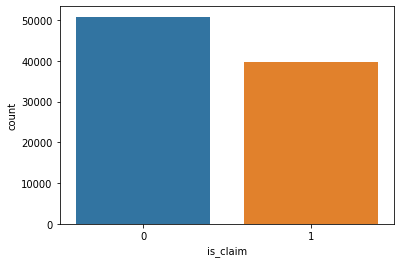

In [357]:
sns.countplot(df["is_claim"])

## Resampling 

In [358]:
X = df.drop(columns = "is_claim")
y = df["is_claim"]

In [359]:
smt = SMOTEENN()
X, y = smt.fit_resample(X, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


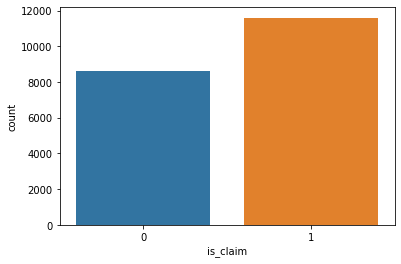

In [360]:
sns.countplot(y)

## Train, validation, test split

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state=42)

In [362]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

## standard scaler in data mining

"Feature scaling" est une méthode utilisée pour normaliser la gamme des variables indépendantes

Par example, si on dispose de plusieurs variables indépendantes telles que population_density, displacement; avec leurs plages respectives de ... , (25 000-75 000 euros), la mise à l'échelle des caractéristiques les aiderait à se trouver toutes dans la même plage, par exemple centrée autour de 0 ou dans la plage (0,1) selon la technique de mise à l'échelle.

In [363]:
from sklearn.preprocessing import StandardScaler

In [364]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train['population_density'] = scaler.fit_transform(X_train['population_density'].values.reshape(-1, 1))
# X_train['displacement'] = scaler.fit_transform(X_train['displacement'].values.reshape(-1, 1))
# X_train['length'] = scaler.fit_transform(X_train['length'].values.reshape(-1, 1))
# X_train['width'] = scaler.fit_transform(X_train['width'].values.reshape(-1, 1))
# X_train['height'] = scaler.fit_transform(X_train['height'].values.reshape(-1, 1))
# X_train['gross_weight'] = scaler.fit_transform(X_train['gross_weight'].values.reshape(-1, 1))
# X_train["max_torque_Nm"] = scaler.fit_transform(X_train["max_torque_Nm"].values.reshape(-1, 1))
# X_train["max_power_bhp"] = scaler.fit_transform(X_train["max_power_bhp"].values.reshape(-1, 1))


In [365]:
X_val['population_density'] = scaler.transform(X_val['population_density'].values.reshape(-1, 1))
# X_val['displacement'] = scaler.transform(X_val['displacement'].values.reshape(-1, 1))
# X_val['length'] = scaler.transform(X_val['length'].values.reshape(-1, 1))
# X_val['width'] = scaler.transform(X_val['width'].values.reshape(-1, 1))
# X_val['height'] = scaler.transform(X_val['height'].values.reshape(-1, 1))
# X_val['gross_weight'] = scaler.transform(X_val['gross_weight'].values.reshape(-1, 1))
# X_val["max_torque_Nm"] = scaler.transform(X_val["max_torque_Nm"].values.reshape(-1, 1))
# X_val["max_power_bhp"] = scaler.transform(X_val["max_power_bhp"].values.reshape(-1, 1))


In [366]:
X_test['population_density'] = scaler.transform(X_test['population_density'].values.reshape(-1, 1))
# X_test['displacement'] = scaler.transform(X_test['displacement'].values.reshape(-1, 1))
# X_test['length'] = scaler.transform(X_test['length'].values.reshape(-1, 1))
# X_test['width'] = scaler.transform(X_test['width'].values.reshape(-1, 1))
# X_test['height'] = scaler.transform(X_test['height'].values.reshape(-1, 1))
# X_test['gross_weight'] = scaler.transform(X_test['gross_weight'].values.reshape(-1, 1))
# X_test["max_torque_Nm"] = scaler.transform(X_test["max_torque_Nm"].values.reshape(-1, 1))
# X_test["max_power_bhp"] = scaler.transform(X_test["max_power_bhp"].values.reshape(-1, 1))


Because we want to use the varianble "policy_tenure" presents for the number month of in a contract to get the probability of a policy with high risk of claim in 6 month, therefore we will use min max scaler for this variable

In [367]:
scaler = MinMaxScaler()

In [368]:
X_train['policy_tenure'] = scaler.fit_transform(X_train['policy_tenure'].values.reshape(-1, 1))
X_val['policy_tenure'] = scaler.transform(X_val['policy_tenure'].values.reshape(-1, 1))
X_test['policy_tenure'] = scaler.transform(X_test['policy_tenure'].values.reshape(-1, 1))

In [369]:
X_train.shape

(9895, 56)

## PCA

### Min max scaler before using PCA and logistic regression

In [370]:
X_train_log = X_train.copy()
X_val_log = X_val.copy()
X_test_log = X_test.copy()

In [371]:
X_train_log['displacement'] = scaler.fit_transform(X_train_log['displacement'].values.reshape(-1, 1))
X_train_log['length'] = scaler.fit_transform(X_train_log['length'].values.reshape(-1, 1))
X_train_log['width'] = scaler.fit_transform(X_train_log['width'].values.reshape(-1, 1))
X_train_log['height'] = scaler.fit_transform(X_train_log['height'].values.reshape(-1, 1))
X_train_log['gross_weight'] = scaler.fit_transform(X_train_log['gross_weight'].values.reshape(-1, 1))
X_train_log["max_torque_Nm"] = scaler.fit_transform(X_train_log["max_torque_Nm"].values.reshape(-1, 1))
X_train_log["max_power_bhp"] = scaler.fit_transform(X_train_log["max_power_bhp"].values.reshape(-1, 1))

In [372]:
X_val_log['displacement'] = scaler.transform(X_val_log['displacement'].values.reshape(-1, 1))
X_val_log['length'] = scaler.transform(X_val_log['length'].values.reshape(-1, 1))
X_val_log['width'] = scaler.transform(X_val_log['width'].values.reshape(-1, 1))
X_val_log['height'] = scaler.transform(X_val_log['height'].values.reshape(-1, 1))
X_val_log['gross_weight'] = scaler.transform(X_val_log['gross_weight'].values.reshape(-1, 1))
X_val_log["max_torque_Nm"] = scaler.transform(X_val_log["max_torque_Nm"].values.reshape(-1, 1))
X_val_log["max_power_bhp"] = scaler.fit_transform(X_val_log["max_power_bhp"].values.reshape(-1, 1))

Text(0.5, 1.0, 'hp')

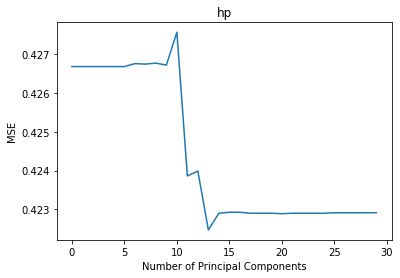

In [373]:
pca = PCA()
X_train_reduced = pca.fit_transform(X_train_log)


cv = RepeatedKFold(n_splits = 10, n_repeats = 8, random_state = 42)

regr = LogisticRegression(max_iter = 400)
mse = []

# MSE 
score = -1 * model_selection.cross_val_score(regr, np.ones((len(X_train_reduced),1)), y_train, cv = cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 30):
    score = -1 * model_selection.cross_val_score(regr, X_train_reduced[:,:i], y_train, cv=cv, scoring = 'neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [374]:
mse.index(min(mse))

13

In [375]:
cum_pca=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cum_pca

array([ 57.53,  73.46,  82.58,  88.37,  92.63,  95.16,  96.99,  98.05,
        98.74,  99.23,  99.68,  99.92, 100.  , 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01])

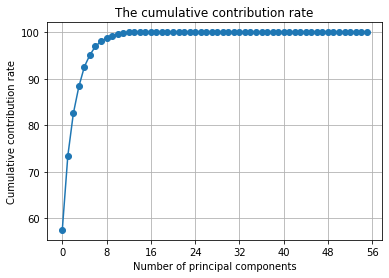

In [376]:
cum_pca=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cum_pca
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot(cum_pca, marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.title('The cumulative contribution rate')
plt.grid()
plt.show()

## Prediction
### logistic regression in term of statistics

In [377]:
!pip install pygam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [378]:
import statsmodels.api as sm

In [379]:
X_2 = X[["policy_tenure", "age_of_policyholder","age_of_car", "population_density", "height", "width", "turning_radius", "gross_weight", "length", "segment"]]

In [380]:
x_stat = sm.add_constant(X_2)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [381]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [382]:
# on ajuste le modèle
model = sm.Logit(y, x_stat)
result = model.fit(maxiter = 200)

Optimization terminated successfully.
         Current function value: 0.677764
         Iterations 4


In [383]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_claim   No. Observations:                20197
Model:                          Logit   Df Residuals:                    20186
Method:                           MLE   Df Model:                           10
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                0.006481
Time:                        16:48:16   Log-Likelihood:                -13689.
converged:                       True   LL-Null:                       -13778.
Covariance Type:            nonrobust   LLR p-value:                 4.606e-33
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5276      0.882     -1.732      0.083      -3.257       0.202
policy_tenure           0.4227      0.036     11.660      0.000       0.352       0.494
age_of_policyholder    -0.0340      0.123     -0.277      0.782      -0.275       0.207
age_of_car             -1.5585      0.303     -5.142      0.000      -2.153      -0.965
population_density   1.478e-06   1.26e-06      1.171      0.242   -9.96e-07    3.95e-06
height                  0.0007      0.000      2.013      0.044    1.79e-05       0.001
width                6.951e-05      0.000      0.153      0.878      -0.001       0.001
turning_radius         -0.5919      0.360     -1.646      0.100      -1.297       0.113
gross_weight           -0.0002      0.000     -1.274      0.203      -0.001       0.000
length                  0.0010      0.001      1.985      0.047     1.3e-05       0.002
segment                -0.1275      0.046     -2.747      0.006      -0.218      -0.037
=======================================================================================
"""

### GAM

In [384]:
from pygam import LogisticGAM, s, f,l

In [385]:
classifierG = LogisticGAM(l(0) + l(1) + l(3) + l(9) + s(2) + s(4) + s(5) + s(7))

In [386]:
classifierG.fit(X_2, y)
classifierG.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     29.5362
Link Function:                        LogitLink Log Likelihood:                                -13651.1125
Number of Samples:                        20197 AIC:                                            27361.2974
                                                AICc:                                           27361.3929
                                                UBRE:                                               3.3559
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0092
Feature Function                  Lam

<ipython-input-386-4d6e68586e19>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  classifierG.summary()


In [387]:
classifierG.statistics_

{'n_samples': 20197,
 'm_features': 10,
 'edof_per_coef': array([9.99772590e-01, 9.97936846e-01, 9.99225587e-01, 9.99167541e-01,
        9.75447864e-01, 8.44530902e-01, 7.42835799e-01, 8.02109375e-01,
        8.83545968e-01, 9.15962892e-01, 9.21836926e-01, 9.24578024e-01,
        9.21325697e-01, 9.17228036e-01, 9.09133628e-01, 9.00643005e-01,
        8.83829595e-01, 8.52738157e-01, 8.10835127e-01, 7.42125407e-01,
        6.84775702e-01, 6.59591538e-01, 6.70085938e-01, 2.84326741e-02,
        9.99643485e-01, 9.99444462e-01, 9.98799945e-01, 9.97929463e-01,
        9.94412934e-01, 8.03259804e-01, 8.61978482e-01, 7.98215156e-01,
        9.99415752e-01, 9.99010508e-01, 1.60030841e-07, 8.56065634e-08,
        3.38010844e-08, 3.79169007e-10, 1.80631738e-10, 4.37561451e-09,
        2.35903677e-12, 4.36797166e-07, 4.05200173e-06, 5.99256649e-06,
        1.23381493e-07, 1.34159251e-06, 9.55816867e-02, 1.13098605e-09,
        9.96076233e-10, 6.77221256e-10, 7.31698154e-09, 1.34260552e-08,
       

When s2 and S4 are higher correlated, we can consider the model below:

In [388]:
print(classifierG.terms)

l(0) + l(1) + l(3) + l(9) + s(2) + s(4) + s(5) + s(7) + intercept


In [389]:
classifierG.coef_

array([ 4.15377528e-01, -1.38302012e-02,  1.38012552e-06,  4.86467492e-01,
        4.30489880e-01,  1.57911942e-01,  2.29801612e-02,  3.27847183e-01,
        3.88151530e-01,  2.92574461e-01,  1.52668161e-01,  1.32998041e-01,
        2.60792776e-01,  1.38047758e-01,  3.46344013e-01, -8.09712614e-02,
       -7.83883215e-03, -7.39381394e-02, -1.46130608e-01, -9.07492947e-02,
       -2.23886339e-01, -4.54960122e-01, -1.26768489e+00, -2.25134117e+00,
        4.31145238e-01,  8.06104091e-01,  1.17876138e+00,  1.47825714e+00,
        1.68938780e+00,  1.99637465e+00,  2.18321893e+00,  2.08489767e+00,
        1.72830549e+00,  1.19351538e+00,  5.76458814e-01, -3.83243234e-02,
       -5.98877043e-01, -1.10815547e+00, -1.57470542e+00, -2.00707267e+00,
       -2.41380294e+00, -2.80344194e+00, -3.18453530e+00, -3.56420433e+00,
        1.45485725e+00,  1.35764011e+00,  1.26184716e+00,  1.17459949e+00,
        1.10294368e+00,  1.04748738e+00,  1.00710937e+00,  9.66804285e-01,
        8.14850039e-01,  

In [390]:
classifierG.accuracy(X_2, y)

0.5801851760162401

In [391]:
from statsmodels.gam.api import GLMGam, BSplines

In [392]:
classifier2 = LogisticGAM(l(0) + l(1) + f(3) + l(9) + s(2, 4) + s(5) + s(7))

In [393]:
classifier2.fit(X_2, y)
classifier2.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     25.8153
Link Function:                        LogitLink Log Likelihood:                                -13651.3245
Number of Samples:                        20197 AIC:                                            27354.2797
                                                AICc:                                           27354.3537
                                                UBRE:                                               3.3554
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0092
Feature Function                  Lam

<ipython-input-393-0f19871e5aca>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  classifier2.summary()


### Logistic regression

**With applying PCA**

In [394]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [395]:
pca = PCA(n_components = (mse.index(min(mse)) + 1))
X_reduced = pca.fit_transform(X_train_log)

In [396]:
log = LogisticRegression( random_state = 42)
log.fit(X_reduced, y_train)

X_val_transform = pca.transform(X_val_log)
y_pred_1 = log.predict(X_val_transform)

In [397]:
print(classification_report(y_val, y_pred_1))

              precision    recall  f1-score   support

           0       0.52      0.02      0.03      1801
           1       0.58      0.99      0.73      2441

    accuracy                           0.58      4242
   macro avg       0.55      0.50      0.38      4242
weighted avg       0.55      0.58      0.43      4242



**Without PCA**

In [432]:
classifier1 = LogisticRegression( max_iter = 300, random_state = 42 )
classifier1.fit( X_train_log, y_train )
y_pred_2 = classifier1.predict(X_val_log)

In [433]:
print(classification_report(y_val, y_pred_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1801
           1       0.58      1.00      0.73      2441

    accuracy                           0.58      4242
   macro avg       0.29      0.50      0.37      4242
weighted avg       0.33      0.58      0.42      4242



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [400]:
confusion_matrix(y_val, y_pred_2)

array([[   0, 1801],
       [   0, 2441]])

## Random Forest

In [401]:
classifier = RandomForestClassifier( random_state=42)
 
classifier.fit(X_train,y_train)

preds = classifier.predict(X_val)

In [402]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1801
           1       0.76      0.84      0.80      2441

    accuracy                           0.76      4242
   macro avg       0.75      0.74      0.74      4242
weighted avg       0.76      0.76      0.75      4242



In [403]:
preds2 = classifier.predict(X_test)

In [404]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      2583
           1       0.76      0.82      0.79      3477

    accuracy                           0.75      6060
   macro avg       0.75      0.74      0.74      6060
weighted avg       0.75      0.75      0.75      6060



In [405]:
from sklearn.metrics import confusion_matrix

In [406]:
confusion_matrix(y_test, preds2)

array([[1702,  881],
       [ 614, 2863]])

## Support Vector Machine

In [407]:
from sklearn.svm import SVC

In [408]:
classifierSVM = SVC(random_state = 42)
# traininf the model
classifierSVM.fit(X_train_log, y_train)

SVC(random_state=42)

In [409]:
y_pred = classifierSVM.predict(X_val_log)

In [410]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1801
           1       0.58      1.00      0.73      2441

    accuracy                           0.58      4242
   macro avg       0.29      0.50      0.37      4242
weighted avg       0.33      0.58      0.42      4242



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [411]:
confusion_matrix(y_val, y_pred)

array([[   0, 1801],
       [   0, 2441]])

In [412]:
y_predSVM = classifierSVM.predict(X_test_log)

In [413]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2583
           1       0.57      1.00      0.73      3477

    accuracy                           0.57      6060
   macro avg       0.29      0.50      0.36      6060
weighted avg       0.33      0.57      0.42      6060



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [414]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [415]:
from statsmodels.stats.contingency_tables import cochrans_q 

In [416]:
res = cochrans_q(X_train)
print(res)

df          55
pvalue      0.0
statistic   129635.0


In [417]:
val = cochrans_q(X)
print(val)

df          55
pvalue      0.0
statistic   6050.0


## Time of playing with parameters

**We can simplify the model by select the important feature**

In [418]:
import matplotlib.pyplot as plot
model = RandomForestClassifier(n_estimators=600,n_jobs=-1,max_depth = 260, random_state=42)
model.fit(X_train, y_train)
print(model.feature_importances_)

[1.68492996e-04 1.76265464e-04 2.47369307e-04 8.80321139e-05
 7.21523318e-05 3.16061248e-04 2.92352605e-04 3.05195431e-04
 5.87441315e-05 2.89018623e-04 1.42143091e-04 1.09548477e-04
 5.82060124e-05 3.71013127e-04 1.17171734e-04 9.99854244e-05
 2.05250840e-04 3.08298940e-04 1.67650235e-04 2.07763705e-04
 1.72032699e-04 3.50283898e-01 2.06489090e-01 2.74066958e-01
 1.52849576e-01 4.67519785e-04 7.53899564e-04 3.01205904e-04
 3.04814764e-04 2.05631570e-04 8.96258363e-05 1.38758805e-04
 2.78756345e-04 7.41708698e-04 2.41438011e-04 9.97610969e-05
 7.89771356e-04 8.77519320e-04 8.57173270e-04 1.02847024e-03
 8.48826803e-04 2.32719749e-04 1.87687328e-04 2.15153555e-04
 2.58471183e-04 2.74363882e-04 1.48256105e-04 1.63988131e-04
 7.94139501e-05 2.28817750e-04 2.49779720e-04 1.60999511e-04
 5.25294976e-05 7.24606094e-04 6.60528570e-04 6.75533548e-04]


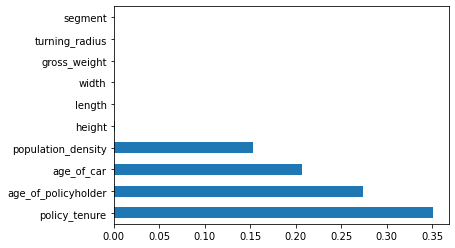

In [419]:
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [420]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index = X_train.columns).sort_values(ascending=False)
feature_imp

policy_tenure                       0.350284
age_of_policyholder                 0.274067
age_of_car                          0.206489
population_density                  0.152850
height                              0.001028
length                              0.000878
width                               0.000857
gross_weight                        0.000849
turning_radius                      0.000790
segment                             0.000754
displacement                        0.000742
ncap_rating                         0.000725
max_power_bhp                       0.000676
max_torque_Nm                       0.000661
make                                0.000468
model_M2                            0.000371
transmission_type_Automatic         0.000316
model_M6                            0.000308
steering_type_Electric              0.000305
is_esc                              0.000305
airbags                             0.000301
transmission_type_Manual            0.000292
steering_t

In [421]:
X_train2 = X_train[["policy_tenure", "age_of_policyholder","age_of_car", "population_density", "height", "width", "turning_radius", "gross_weight", "length"]]
X_val2 = X_val[["policy_tenure", "age_of_policyholder","age_of_car", "population_density", "height", "width", "turning_radius", "gross_weight", "length"]]
X_test2 = X_test[["policy_tenure", "age_of_policyholder","age_of_car", "population_density", "width", "turning_radius", "gross_weight", "length"]]

In [422]:
classifier = RandomForestClassifier(n_estimators=600,n_jobs=-1,max_depth = 260, random_state=42)
 
classifier.fit(X_train2,y_train)

preds = classifier.predict(X_val2)

In [423]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1801
           1       0.76      0.85      0.80      2441

    accuracy                           0.76      4242
   macro avg       0.76      0.75      0.75      4242
weighted avg       0.76      0.76      0.76      4242



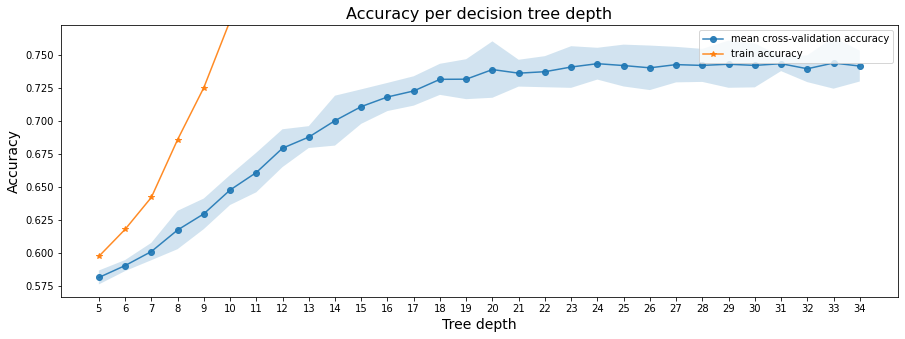

In [424]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = RandomForestClassifier(max_depth = depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(5, 35)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth')



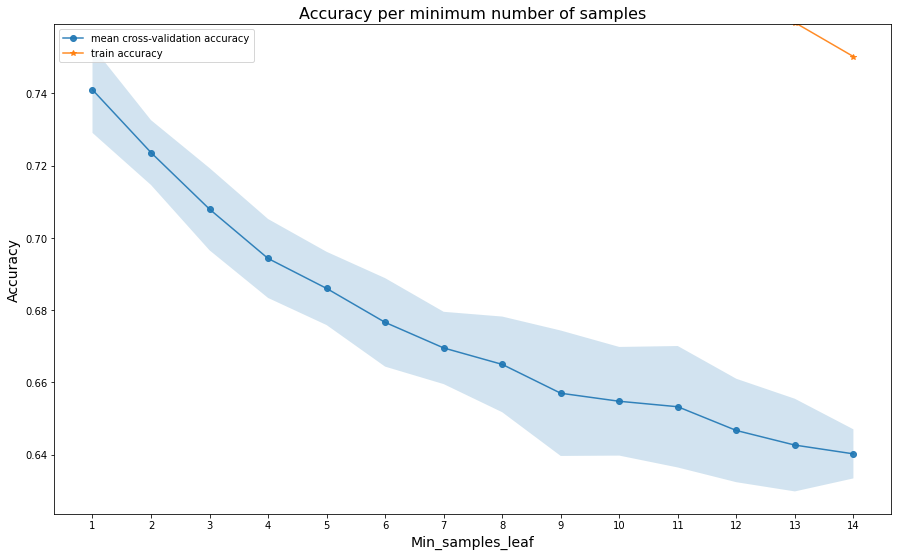

In [425]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, min_samples, cv = 5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in min_samples:
        tree_model = RandomForestClassifier(min_samples_leaf = depth)
        cv_scores = cross_val_score(tree_model, X, y, cv = cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,9))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Min_samples_leaf', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
leaf = range(1, 15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, leaf)

# plotting accuracy
plot_cross_validation_on_trees(leaf, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per minimum number of samples')

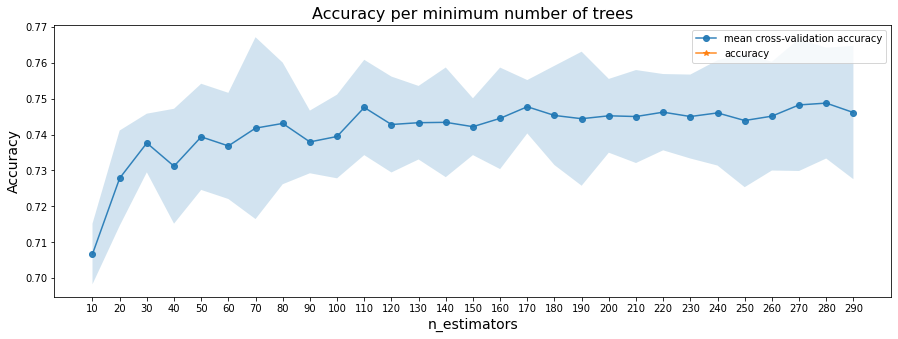

In [426]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, estimators, cv = 5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for estimator in estimators:
        tree_model = RandomForestClassifier(n_estimators = estimator)
        cv_scores = cross_val_score(tree_model, X, y, cv = cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('n_estimators', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
nb = range(10, 300, 10)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, nb)

# plotting accuracy
plot_cross_validation_on_trees(nb, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per minimum number of trees')

In [427]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 30)]
# number of features at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# max depth
max_depth = [int(x) for x in np.linspace( 50, 500, num = 15)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'min_samples_split': min_samples_split,
 'min_samples_leaf': min_samples_leaf
 }
rf_Model = RandomForestClassifier()
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rf_Model, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 720, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 146}


In [428]:
classifier5 = RandomForestClassifier(n_estimators= 1065,max_depth = 146,min_samples_split = 2, random_state=42 )
 
classifier5.fit(X_train,y_train)

preds5 = classifier5.predict(X_val)

In [429]:
print(classification_report(y_val, preds5))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1801
           1       0.76      0.84      0.80      2441

    accuracy                           0.76      4242
   macro avg       0.76      0.74      0.75      4242
weighted avg       0.76      0.76      0.75      4242

